In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette('deep')

In [7]:
train = pd.read_csv("../data/processed/two_models/X_train.csv", index_col="client_id")
valid = pd.read_csv("../data/processed/two_models/X_valid.csv", index_col="client_id")
test = pd.read_csv("../data/processed/two_models/X_test.csv", index_col="client_id")

In [8]:
train.columns

Index(['age', 'n_transactions', 'avg_transaction_time',
       'stddev_transaction_time', 'mode_transaction_weekday',
       'sum_regular_points_received', 'sum_express_points_received',
       'sum_regular_points_spent', 'sum_express_points_spent',
       'avg_regular_points_received', 'avg_express_points_received',
       'avg_regular_points_spent', 'avg_express_points_spent',
       'stdddev_regular_points_received', 'stdddev_express_points_received',
       'stdddev_regular_points_spent', 'stdddev_express_points_spent',
       'sum_purchase_sum', 'avg_purchase_sum', 'stddev_purchase_sum',
       'n_stores', 'sum_n_unique_products', 'sum_n_products',
       'sum_avg_product_price', 'sum_sum_trn_sum_from_iss',
       'sum_sum_trn_sum_from_red', 'sum_diff_sum_from_iss_red',
       'avg_n_unique_products', 'avg_n_products', 'avg_avg_product_price',
       'avg_sum_trn_sum_from_iss', 'avg_sum_trn_sum_from_red',
       'avg_diff_sum_from_iss_red', 'stddev_n_unique_products',
       'stdd

In [9]:
train.head()

,age,n_transactions,avg_transaction_time,stddev_transaction_time,mode_transaction_weekday,sum_regular_points_received,sum_express_points_received,sum_regular_points_spent,sum_express_points_spent,avg_regular_points_received,...,first_issue_weekday,first_issue_dayofmonth,first_issue_year,first_issue_month,first_issue_weekofyear,first_issue_week,first_issue_quarter,diff,avg_transaction_hour,last_month_avg_transaction_hour
client_id,,,,,,,,,,,,,,,,,,,,,
c3701ec73c,49,1,35759.000000,NaN,1.0,7.7,0.0,0.0,0.0,7.700000,...,5,3,2017,6,22,22,2,30856814.0,9,9
a1bb244ab2,29,33,53416.818182,11329.583795,5.0,23.6,0.0,-27.0,-30.0,0.715152,...,4,25,2017,8,34,34,3,2151559.0,14,13
48d2661517,48,5,57197.200000,8840.614837,4.0,9.5,0.0,-11.0,-120.0,1.900000,...,5,20,2017,5,20,20,2,10124566.0,15,15
0576e3d767,42,29,51320.137931,7820.300185,2.0,42.8,0.0,-138.0,0.0,1.475862,...,5,19,2017,8,33,33,3,22102558.0,14,13
c06f21a8ee,32,9,55004.444444,10056.537738,4.0,24.3,0.0,-29.0,0.0,2.700000,...,4,4,2018,5,18,18,2,12099142.0,15,16


In [13]:
plt.rcParams["figure.figsize"] = 15, 10

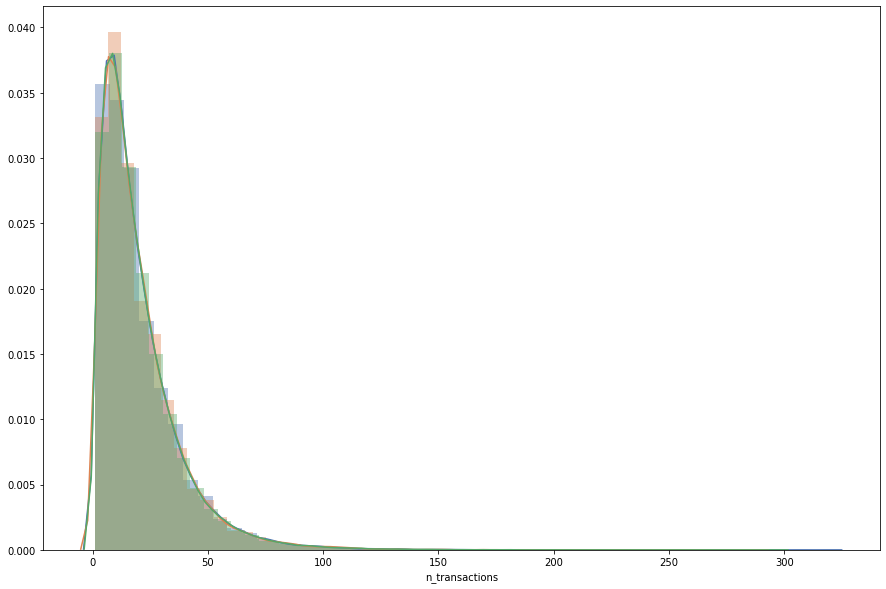

In [21]:
sns.distplot(train['n_transactions'], hist=True)
sns.distplot(valid['n_transactions'], hist=True)
sns.distplot(test['n_transactions'], hist=True)

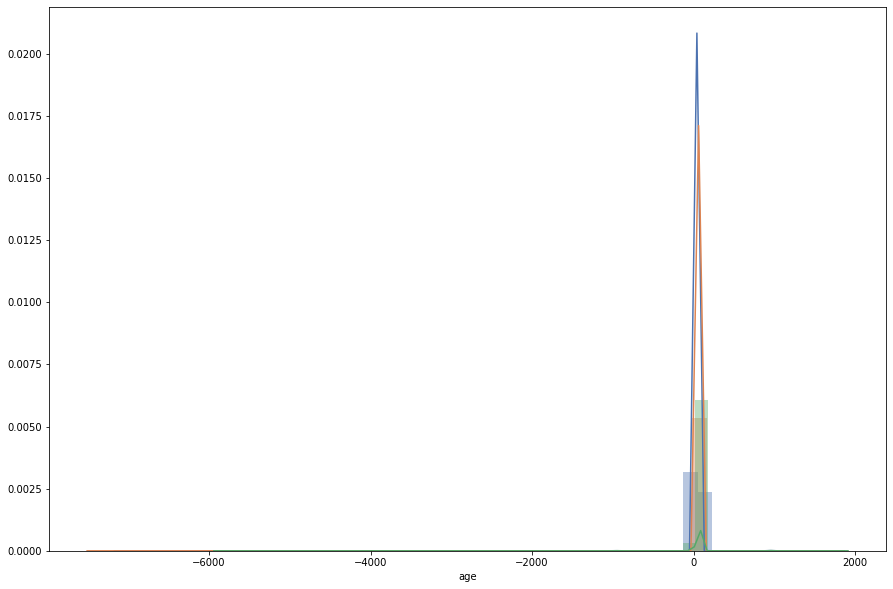

In [22]:
sns.distplot(train['age'], hist=True)
sns.distplot(valid['age'], hist=True)
sns.distplot(test['age'], hist=True)

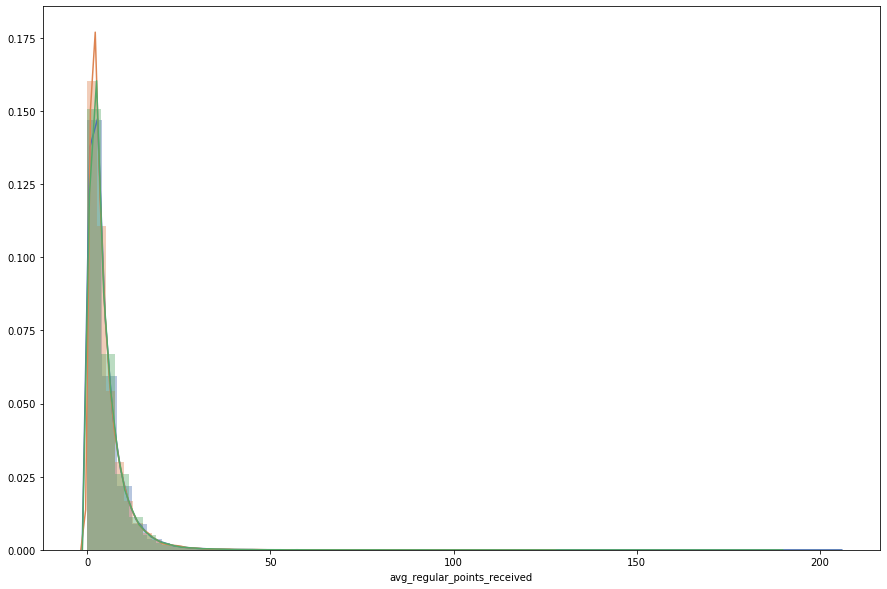

In [24]:
sns.distplot(train['avg_regular_points_received'], hist=True)
sns.distplot(valid['avg_regular_points_received'], hist=True)
sns.distplot(test['avg_regular_points_received'], hist=True)

In [29]:
train['first_issue_date'] = (
    train['first_issue_year'].astype(str) + "-" + train['first_issue_month'].astype(str) + "-" + train['first_issue_dayofmonth'].astype(str)
)
train['first_issue_date'] = pd.to_datetime(train['first_issue_date'])

valid['first_issue_date'] = (
    valid['first_issue_year'].astype(str) + "-" + valid['first_issue_month'].astype(str) + "-" + valid['first_issue_dayofmonth'].astype(str)
)
valid['first_issue_date'] = pd.to_datetime(valid['first_issue_date'])

test['first_issue_date'] = (
    test['first_issue_year'].astype(str) + "-" + test['first_issue_month'].astype(str) + "-" + test['first_issue_dayofmonth'].astype(str)
)
test['first_issue_date'] = pd.to_datetime(test['first_issue_date'])

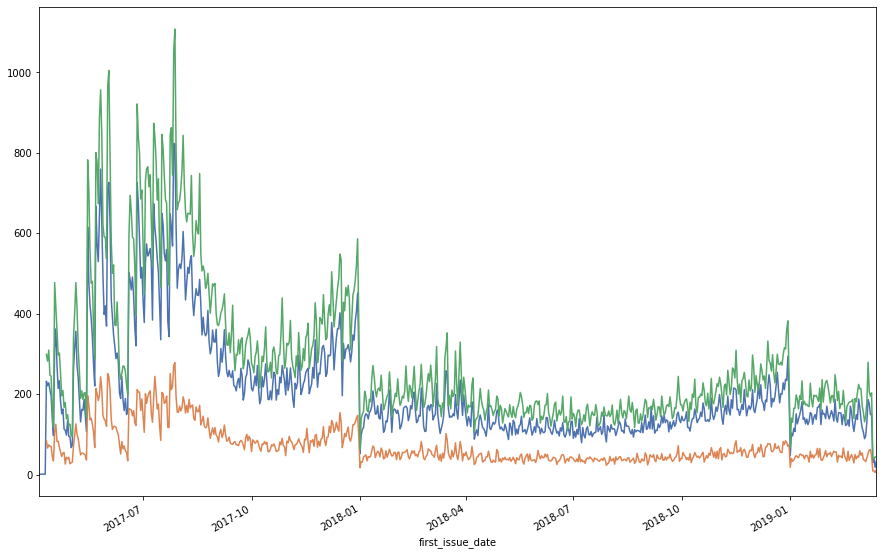

In [34]:
train.groupby(['first_issue_date'])['age'].count().plot()
valid.groupby(['first_issue_date'])['age'].count().plot()
test.groupby(['first_issue_date'])['age'].count().plot()

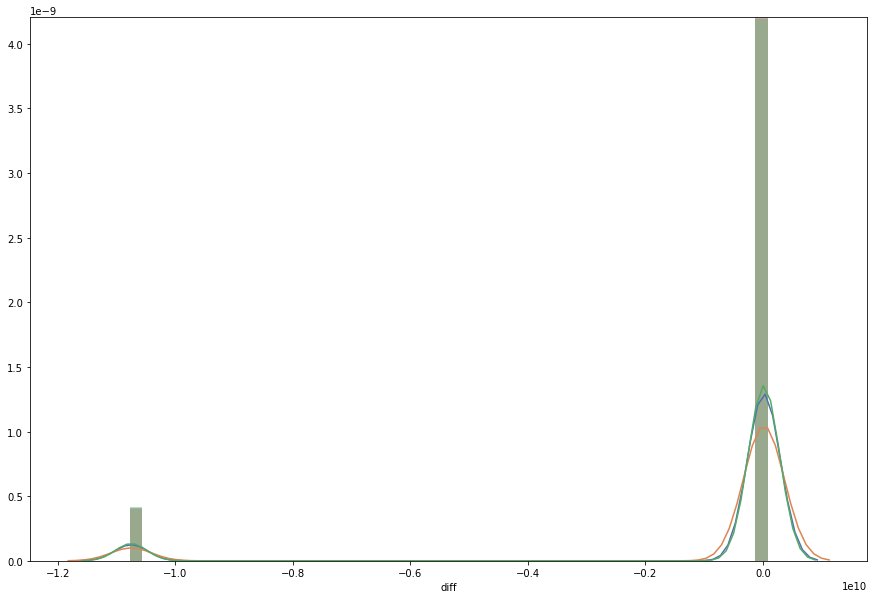

In [36]:
sns.distplot(train['diff'])
sns.distplot(valid['diff'])
sns.distplot(test['diff'])

In [40]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [44]:
host = "localhost"
port = 5434
engine = create_engine(
    "{}://{}:{}@{}:{}/{}".format("postgresql", "postgres", "postgres", host, port, "uplift")
)
session_maker = sessionmaker(bind=engine)

In [45]:
from sqlalchemy import func

In [50]:
from sqlalchemy import Column, String, Integer, DateTime, Float, Boolean, ForeignKey
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

class Purchases(Base):
    __tablename__ = "purchases"

    client_id = Column("client_id", String, ForeignKey("clients.client_id"), nullable=False)
    transaction_id = Column("transaction_id", String, primary_key=True, nullable=False)
    transaction_datetime = Column("transaction_datetime", DateTime, nullable=False)
    regular_points_received = Column("regular_points_received", Float, nullable=False)
    express_points_received = Column("express_points_received", Float, nullable=False)
    regular_points_spent = Column("regular_points_spent", Float, nullable=False)
    express_points_spent = Column("express_points_spent", Float, nullable=False)
    purchase_sum = Column("purchase_sum", Float, nullable=False)
    store_id = Column("store_id", String, primary_key=True, nullable=False)
    product_id = Column("product_id", String, ForeignKey("products.product_id"), primary_key=True, nullable=False)
    product_quantity = Column("product_quantity", Float, nullable=False)
    trn_sum_from_iss = Column("trn_sum_from_iss", Float, nullable=False)
    trn_sum_from_red = Column("trn_sum_from_red", Float, nullable=True)


In [72]:
session = session_maker()
q = session.query(
    Purchases.client_id,
    func.max(Purchases.transaction_datetime),
    func.min(Purchases.transaction_datetime),
).group_by(Purchases.client_id)
data = q.all()

In [73]:
df = pd.DataFrame(data, columns=["client_id", "last_transaction_datetime", "first_transaction_datetime"]).set_index("client_id")
df.head()

,last_transaction_datetime,first_transaction_datetime
client_id,,
000012768d,2019-03-14 15:01:47,2018-12-01 07:12:45
000036f903,2019-03-17 10:29:37,2018-11-28 10:48:36
000048b7a6,2019-03-12 10:28:19,2018-12-15 10:33:11
000073194a,2019-03-16 09:41:21,2018-11-25 10:56:20
00007c7133,2019-03-04 16:23:30,2018-11-24 15:09:24


In [74]:
df["last_transaction_date"] = df["last_transaction_datetime"].dt.date
df["first_transaction_date"] = df["first_transaction_datetime"].dt.date
df.head()

,last_transaction_datetime,first_transaction_datetime,last_transaction_date,first_transaction_date
client_id,,,,
000012768d,2019-03-14 15:01:47,2018-12-01 07:12:45,2019-03-14,2018-12-01
000036f903,2019-03-17 10:29:37,2018-11-28 10:48:36,2019-03-17,2018-11-28
000048b7a6,2019-03-12 10:28:19,2018-12-15 10:33:11,2019-03-12,2018-12-15
000073194a,2019-03-16 09:41:21,2018-11-25 10:56:20,2019-03-16,2018-11-25
00007c7133,2019-03-04 16:23:30,2018-11-24 15:09:24,2019-03-04,2018-11-24


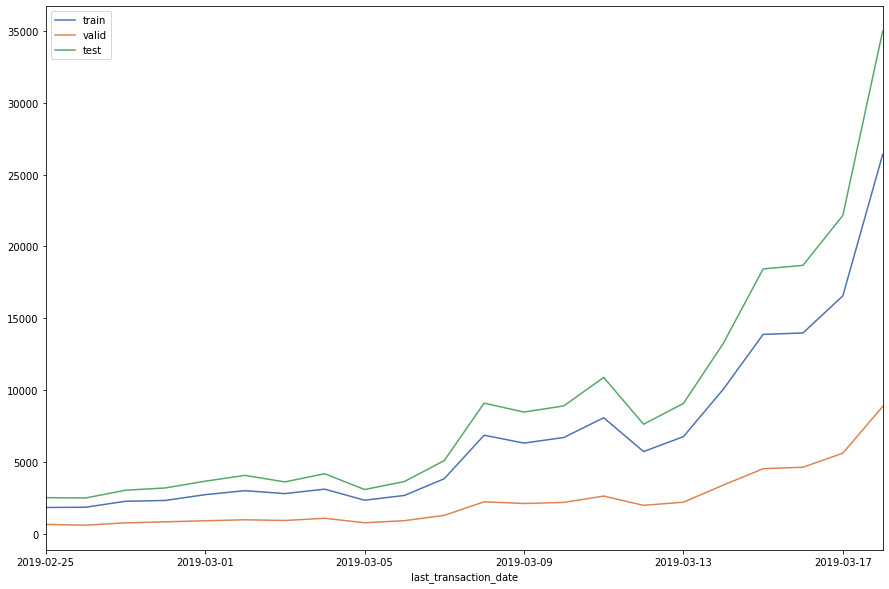

In [104]:
df.loc[train.index].groupby(["last_transaction_date"]).count().iloc[2:]["last_transaction_datetime"].plot(label='train')
df.loc[valid.index].groupby(["last_transaction_date"]).count()["last_transaction_datetime"].plot(label='valid')
df.loc[test.index].groupby(["last_transaction_date"]).count().iloc[1:]["last_transaction_datetime"].plot(label='test')
plt.legend(loc='best')

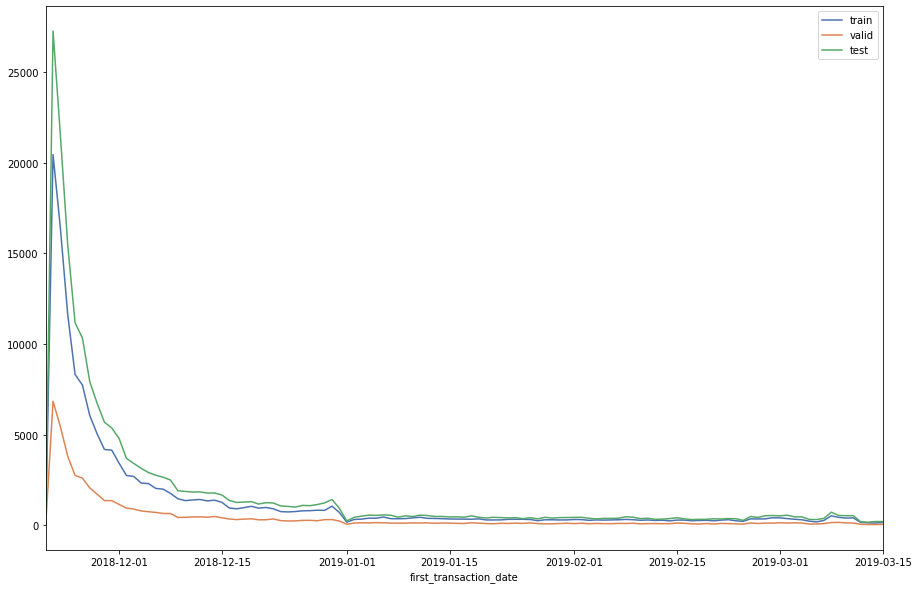

In [76]:
df.loc[train.index].groupby(["first_transaction_date"]).count()["first_transaction_datetime"].plot(label='train')
df.loc[valid.index].groupby(["first_transaction_date"]).count()["first_transaction_datetime"].plot(label='valid')
df.loc[test.index].groupby(["first_transaction_date"]).count()["first_transaction_datetime"].plot(label='test')
plt.legend(loc='best')

In [105]:
from sqlalchemy import distinct

In [106]:
q = session.query(
    Purchases.client_id,
    Purchases.store_id,
    func.count(distinct(Purchases.transaction_id)),
).group_by(Purchases.client_id, Purchases.store_id)
data = q.all()
df = pd.DataFrame(data, columns=["client_id", "store_id", "n_transactions"]).set_index("client_id")
df.head()

,store_id,n_transactions
client_id,,
000012768d,017c89b915,2
000012768d,54a4a11a29,1
000012768d,ed8d2683fd,1
000036f903,116ef2dfce,1
000036f903,3c6c3b17f2,4


In [108]:
(
    df.loc[train.index]['store_id'].nunique(),
    df.loc[valid.index]['store_id'].nunique(),
    df.loc[test.index]['store_id'].nunique()
)

(13877, 13777, 13878)

In [115]:
train_stores = set(df.loc[train.index | valid.index]['store_id'].unique().tolist())
test_stores = set(df.loc[test.index]['store_id'].unique().tolist())

In [116]:
train_stores - test_stores

{'353ef3415e', '3920164af0', '945bcb285a', 'c6655943ad'}

In [117]:
test_stores - train_stores

{'89a7462796', 'ae7380a019', 'c472f940c1'}

In [118]:
df[df['store_id'].isin(train_stores - test_stores)].reset_index().groupby('store_id').agg({'client_id': 'nunique', 'n_transactions': 'sum'})

,client_id,n_transactions
store_id,,
353ef3415e,2,4
3920164af0,8,9
945bcb285a,1,1
c6655943ad,1,1


In [120]:
df.reset_index().groupby('store_id').agg({'client_id': 'nunique', 'n_transactions': 'sum'}).describe()

,client_id,n_transactions
count,13882.000000,13882.000000
mean,84.269342,579.531047
std,50.405150,329.788474
min,1.000000,1.000000
25%,49.000000,347.000000
50%,73.000000,517.000000
75%,108.000000,743.750000
max,539.000000,2956.000000


In [119]:
df[df['store_id'].isin(test_stores - train_stores)].reset_index().groupby('store_id').agg({'client_id': 'nunique', 'n_transactions': 'sum'})

,client_id,n_transactions
store_id,,
89a7462796,3,5
ae7380a019,2,5
c472f940c1,4,121


In [127]:
q = session.query(
    Purchases.client_id,
    Purchases.store_id,
    Purchases.transaction_datetime,
    func.count(distinct(Purchases.transaction_id)),
).filter(
    Purchases.store_id.in_((train_stores - test_stores) | (test_stores - train_stores))
).group_by(
    Purchases.client_id, Purchases.store_id, Purchases.transaction_datetime
)
data = q.all()
df = pd.DataFrame(data, columns=["client_id", "store_id", "transaction_datetime", "n_transactions"]).set_index("client_id")
df.head()

,store_id,transaction_datetime,n_transactions
client_id,,,
067665a902,3920164af0,2018-11-27 09:08:48,1
17cea47a83,89a7462796,2019-03-10 08:16:32,1
17cea47a83,89a7462796,2019-03-16 10:00:14,1
17cea47a83,c472f940c1,2018-11-23 14:51:07,1
17cea47a83,c472f940c1,2018-11-24 08:30:53,1


In [128]:
df['transaction_date'] = df['transaction_datetime'].dt.date

In [132]:
for store in df['store_id'].unique():
    print(
        store,
        df[df['store_id']==store]['transaction_date'].min(),
        df[df['store_id']==store]['transaction_date'].max(),
    )

3920164af0 2018-11-23 2018-11-29
89a7462796 2019-03-01 2019-03-18
c472f940c1 2018-11-22 2019-02-27
353ef3415e 2018-12-20 2019-02-11
ae7380a019 2019-03-14 2019-03-18
c6655943ad 2018-11-28 2018-11-28
945bcb285a 2018-11-23 2018-11-23
